In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

2023-01-08 18:24:21.323250: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


##  Create the dummy data using Scikit-learn's make_blobs method.

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

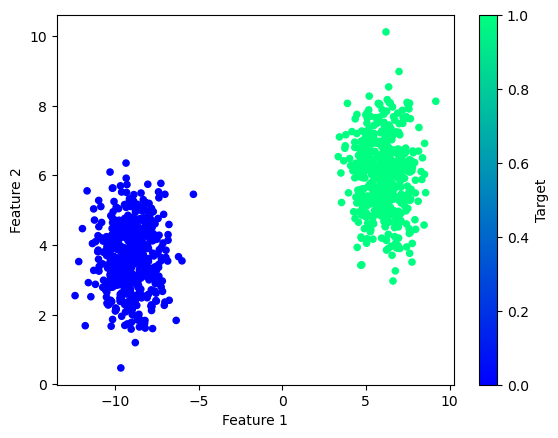

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

## Split our data into training and test datasets using Scikit-learn's train_test_split method

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

## Normalize our dummy data

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

##  Create our Sequential model

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

2023-01-08 18:29:57.439149: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


The nn_model object will store the entire architecture of our neural network model. Our next step is to add our first layer, which will contain our inputs and a hidden layer of neurons.

As we learned earlier, we can add layers to our Sequential model using Keras' Dense class. For our first layer, we need to define a few parameters:

- The input_dimparameter indicates how many inputs will be in the model (in this case two).
- The units parameter indicates how many neurons we want in the hidden layer (in this case one).
- The activation parameter indicates which activation function to use. We'll use the ReLU activation function to allow our hidden layer to identify and train on nonlinear relationships in the dataset.

## Build first Dense layer (input + hidden)

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

## Build output layer

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


## Compile Sequential model

In [11]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train and Test a Basic Neural Network
## Fit the model

In [13]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.6924 - accuracy: 0.5453
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6838 - accuracy: 0.5587
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.5853
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6692 - accuracy: 0.5987
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6627 - accuracy: 0.6187
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6562 - accuracy: 0.6333
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.6373
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6432 - accuracy: 0.6507
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6367 - accuracy: 0.6613
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.6707
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.1578 - accuracy: 0.9760
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1542 - accuracy: 0.9773
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1507 - accuracy: 0.9800
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1472 - accuracy: 0.9800
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1439 - accuracy: 0.9827
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1407 - accuracy: 0.9827
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1375 - accuracy: 0.9827
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.9827
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1313 - accuracy: 0.9827
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1284 - accuracy: 0.9853
Epoch 93/100


## Visualize our model's loss over the full 100 epochs

<AxesSubplot:>

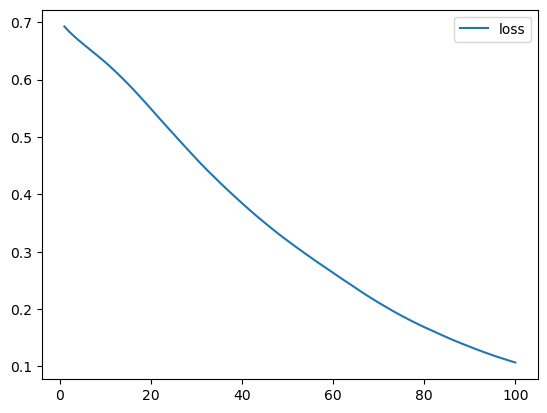

In [15]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

## Plot accuracy over time 

<AxesSubplot:>

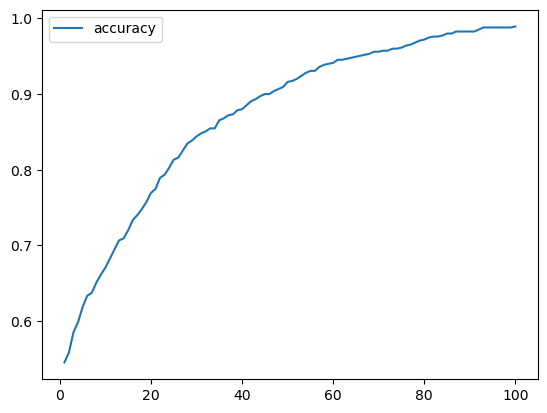

In [17]:
# Plot the accuracy
history_df.plot(y="accuracy")

Looking at the loss and accuracy plots in the images above, we notice that The neural network model took 20 to 30 epochs before it started to fit the training data with high success. Remember, our neural network consisted of a single hidden layer with one neuron—if we were to increase the number of neurons in the hidden layer, the neural network would have been able to fit the training data even faster!

Now that our model has been properly trained, we must evaluate model performance using the test data. 

## Testing a neural network model in TensorFlow 

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0968 - accuracy: 0.9960 - 137ms/epoch - 17ms/step
Loss: 0.09682653099298477, Accuracy: 0.9959999918937683


Looking at the performance metrics from the model, the neural network was able to correctly classify each of the points in the test data. In other words, the model was able to correctly classify data it was not trained on 100% of the time. Although perfect model performance is ideal, more complex datasets and models may not be able to achieve 100% accuracy. Therefore, it is important to establish model performance thresholds before designing any machine learning model. Depending on the type of data and the use case, we may have to recreate and retrain a model using different parameters, different training/test data, or even look to use a different model entirely.

## Apply this model to novel datasets and predict the classification of a data point

In [19]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 60ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

#  Generate some nonlinear moon-shaped data using Scikit-learn's make_moons 

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

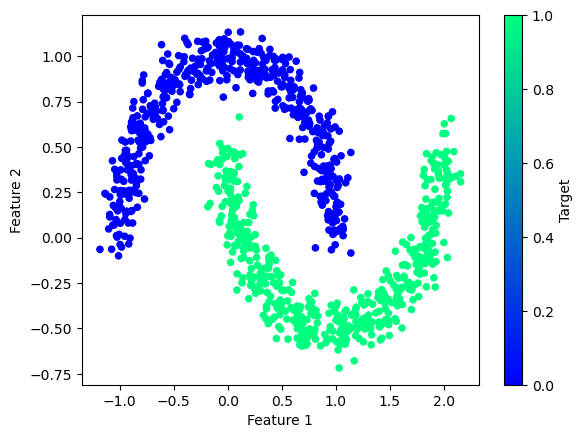

In [20]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

## Training, testing and normaling our datasets

In [21]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

## Train neural network model using the fit method on the nonlinear training data

In [22]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 1.6178 - accuracy: 0.3120
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.3999 - accuracy: 0.3293
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 1.2535 - accuracy: 0.3507
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 1.1518 - accuracy: 0.3693
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0794 - accuracy: 0.3987
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0228 - accuracy: 0.4200
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9776 - accuracy: 0.4387
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9397 - accuracy: 0.4547
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9076 - accuracy: 0.4653
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8797 - accuracy: 0.4827
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.7907
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4222 - accuracy: 0.7907
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.7920
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4163 - accuracy: 0.7920
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.7947
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.7960
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.7987
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 0.8027
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4010 - accuracy: 0.8080
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3979 - accuracy: 0.8107
Epoch 93/100


 TensorFlow stopped training the model after 84 epochs because the loss metric was no longer decreasing at a substantial rate, and the accuracy was not improving.

## Plot out the loss and accuracy curves over our training iterations

<AxesSubplot:>

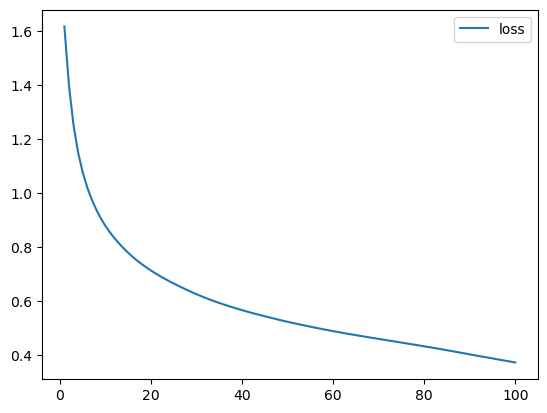

In [23]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

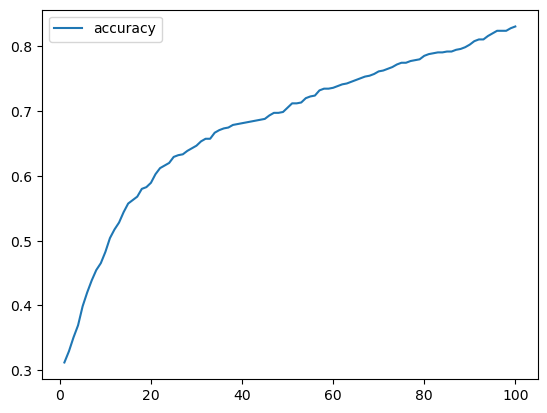

In [24]:
# Plot the accuracy
history_df.plot(y="accuracy")

According to the accuracy metric, the basic single-neuron, single-layer neural network model was only able to correctly classify 89% of all data points in the nonlinear training data. Depending on a person's use case, 89% accuracy could be sufficient for a first-pass model. For example, if we were trying to use a neural network model to separate left-handed people from right-handed people, a model that is correct 89% of the time is very accurate, and guessing incorrectly does not have a huge negative impact.

However, in many industrial and medical use cases, a model's classification accuracy must exceed 95% or even 99%. In these cases, we wouldn't be satisfied with the basic single-neuron, single-layer neural network model, and we would have to design a more robust neural network. In summary, the more complicated and nonlinear the dataset, the more components we'd need to add to a neural network to achieve our desired performance.

# Create Multiple Neuron Neural Network
## Create a new Sequential model

In [25]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

## Add our input, hidden, and output layers using the Dense class

In [26]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

## Compile and train the model using our nonlinear moon-shaped dummy data

In [27]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6649 - accuracy: 0.5707
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6336 - accuracy: 0.5813
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6055 - accuracy: 0.6013
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5807 - accuracy: 0.6267
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5585 - accuracy: 0.6533
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5382 - accuracy: 0.6787
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5193 - accuracy: 0.6960
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.7253
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4831 - accuracy: 0.7507
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.7840
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9147
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2023 - accuracy: 0.9173
Epoch 85/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.9187
Epoch 86/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2001 - accuracy: 0.9187
Epoch 87/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1989 - accuracy: 0.9187
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.1978 - accuracy: 0.9187
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1966 - accuracy: 0.9187
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1955 - accuracy: 0.9187
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1945 - accuracy: 0.9200
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.1932 - accuracy: 0.9200
Epoch 93/100


Looking at the training metrics of our new model, as we increase the number of neurons within the hidden layer, the classification accuracy improves. You may have noticed that adding multiple neurons to our neural network did not yield a perfect classification model. As input data becomes more complex, neural networks will require more and more optimization tweaks to achieve their desired accuracy.